### Install some libs

!pip install treelib

!pip3 install tree_sitter

### Import some libs

In [1]:
from treelib import Node, Tree
from tree_sitter import Language, Parser
import os
import numpy as np
import regex as re
import subprocess

### Initialize Tree-sitter go parser

In [2]:
Language.build_library(
  # Store the library in the `build` directory
  'build/my-languages.so',

  # Include one or more languages
  [
    'tree-sitter-go'
  ]
)

GO_LANGUAGE = Language('build/my-languages.so', 'go')

parser = Parser()
parser.set_language(GO_LANGUAGE)

### Define the commit for each year

See track_ft_changes_kops.ipynb for the methodology on how to find these commits

In [38]:
commits = dict()

commits['boulder'] = ['208d46bf46e86576866f2e34ec8a402159d2b75e',
            '6f56f5a30274b1839445826037eae5fa881e6280',
            '36c1f1ab2d2fd6a6dd598d1dbe4bb3c1f757a51d',
            '17392201b2caf18e1a5b3745f00362ed1a3a8a65',
            'f7c6fefc3d607296b7438a16829fcc88285aca43']
commits['juju'] = ['9da3d236dbc334f9bb362e16656401f7ea6525b5',
        'd9a360c160dd7c561f821000146be65599de717b',
        '4234476e6d2b774c9d0550dac19b82d65a3527dc',
        '559f6b00bbdb0a6b672505aefc692f24c8568f1c',
        '89faeee9508000ac39e25066e2a104adf080fcfc']
commits['kops'] = ["c72ef959b710612855fe4a03460d2bbd9d38fd7d",
        "94ef2027bed84f7335b5f3aa37f3fec99eb04089",
        "2c204246567cebcb5badf11550cc2778aa9b79a9",
        "5db135e3bd4e66e1c5e9301914fc7c33eed7f4a7",
        '5f1d95c98cca311892819fb73a071d853e70a80c']
commits['kubernetes'] = ['d5a4a13cfa4606b064bc52bdac383720f4a37a2e', 
              '6443b6f5438a2a59ef7f83db7411f69ded557bbe',
              'dc1fa870bff65c20f48a83ea3af54adb3f526e28',
              'ef69bc910f0e47bbe3cf396d4bebf4f678cf6f3a',
              '16227cf09dcb6d1a71733d9fa20335007b0ca3d2']
commits['loomchain'] = ['',
                        '',
                        'af9f4a8f3cbdde6c05d81fbeebe775932e6e99b1',
             'd60731829e0f0a82499633d0593fc8290afbc1e6',
             '350994c2dbc2c32253d15fa2789ac9ac4236aef0']

res_evo_interact = dict()

for system in commits.keys():
    
    print(system)
    
    coms = commits[system]
    
    for index_com in range(len(coms)):
        
        com = coms[index_com]
        
        if com !='':
            
            cmd_line = "cd ~/Documents/vamos2022/"+system+" && git reset --hard "+com[0:7]
            os.system(cmd_line)
            
            try:
                tc = ToggleCatcher(system)

                statements = tc.analyse_statements()


                res_kw = dict()
                for i in ["unused", "used", "interact"]:
                    res_kw[i] = 0
                all_kw = list(np.copy(tc.keywords))
                all_kw.append('expr')
                for kw in tc.keywords:
                    res = "unused"
                    if kw in statements[0]:
                        res = "used"
                    for k in all_kw:
                        if (min(k, kw), max(k,kw)) in statements[1] or (min(k, kw), max(k,kw)) in statements[2]:
                            res = 'interact'
                    res_kw[res]+=1
                print(res_kw)

                res_evo_interact[system, index_com] = str(res_kw["interact"])
            except:
                print("blc")
            
        else:
            res_evo_interact[system, index_com] = ''

boulder
{'unused': 7, 'used': 5, 'interact': 7}
{'unused': 4, 'used': 3, 'interact': 6}
{'unused': 5, 'used': 3, 'interact': 6}
{'unused': 7, 'used': 3, 'interact': 7}
{'unused': 5, 'used': 4, 'interact': 6}
juju
{'unused': 2, 'used': 8, 'interact': 4}
{'unused': 1, 'used': 2, 'interact': 1}
{'unused': 1, 'used': 6, 'interact': 3}
{'unused': 1, 'used': 9, 'interact': 3}
{'unused': 1, 'used': 9, 'interact': 3}
kops
{'unused': 0, 'used': 1, 'interact': 0}
{'unused': 0, 'used': 8, 'interact': 1}
{'unused': 0, 'used': 13, 'interact': 1}
{'unused': 0, 'used': 16, 'interact': 1}
{'unused': 1, 'used': 15, 'interact': 7}
kubernetes
{'unused': 27, 'used': 21, 'interact': 44}
{'unused': 8, 'used': 12, 'interact': 11}
{'unused': 11, 'used': 15, 'interact': 35}
{'unused': 21, 'used': 15, 'interact': 43}
{'unused': 33, 'used': 27, 'interact': 49}
loomchain
{'unused': 13, 'used': 19, 'interact': 4}
{'unused': 15, 'used': 23, 'interact': 3}
{'unused': 21, 'used': 27, 'interact': 7}


In [39]:
res_evo_interact

{('boulder', 0): '7',
 ('boulder', 1): '6',
 ('boulder', 2): '6',
 ('boulder', 3): '7',
 ('boulder', 4): '6',
 ('juju', 0): '4',
 ('juju', 1): '1',
 ('juju', 2): '3',
 ('juju', 3): '3',
 ('juju', 4): '3',
 ('kops', 0): '0',
 ('kops', 1): '1',
 ('kops', 2): '1',
 ('kops', 3): '1',
 ('kops', 4): '7',
 ('kubernetes', 0): '44',
 ('kubernetes', 1): '11',
 ('kubernetes', 2): '35',
 ('kubernetes', 3): '43',
 ('kubernetes', 4): '49',
 ('loomchain', 0): '',
 ('loomchain', 1): '',
 ('loomchain', 2): '4',
 ('loomchain', 3): '3',
 ('loomchain', 4): '7'}

In [59]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

res_evo_interact[('loomchain', 0)] = '0'
res_evo_interact[('loomchain', 1)] = '0'

df = pd.DataFrame([(k[0][0].upper()+k[0][1:], 
                    'R'+str(k[1]+1), res_evo_interact[k[0], k[1]]) for k in res_evo_interact.keys()])
df.columns = ["System", "Releases", "#Interact"]
df

,System,Releases,#Interact
0,Boulder,R1,7
1,Boulder,R2,6
2,Boulder,R3,6
3,Boulder,R4,7
4,Boulder,R5,6
5,Juju,R1,4
6,Juju,R2,1
7,Juju,R3,3
8,Juju,R4,3
9,Juju,R5,3


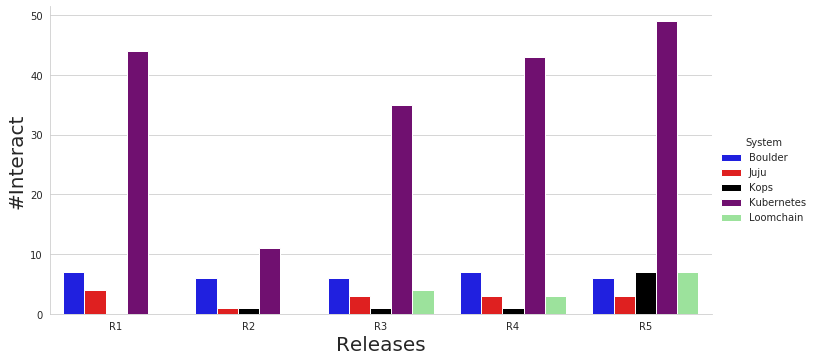

In [68]:
sns.set_style("whitegrid")
fig_size = (10, 5)
g = sns.catplot(
    data = df, 
    kind = "bar",
    x = "Releases", 
    y = "#Interact", 
    hue = "System",
    ci="sd", 
    palette=['blue', 'red', 'black', 'purple', 'lightgreen', 'grey'], 
    alpha=1, 
    height=fig_size[1],
    aspect=fig_size[0]/fig_size[1]
)
plt.xlabel("Releases", size = 20)
plt.ylabel("#Interact", size =20)
#plt.ylim((0,0.6))
plt.savefig("evolution_interact.png", dpi =300)
plt.show()

In [13]:
tc.goto_commit('350994c2dbc2c32253d15fa2789ac9ac4236aef0')

### Search for keywords

In [3]:
from treelib import Node, Tree
from tree_sitter import Language, Parser
import os
import re
import json
import numpy as np
import graphviz
from IPython.display import IFrame

if not os.path.isdir('./tree-sitter-go'):
    print("Cloning https://github.com/tree-sitter/tree-sitter-go")
    os.system("git clone https://github.com/tree-sitter/tree-sitter-go")
            
Language.build_library('build/my-languages.so', ['tree-sitter-go'])
GO_LANGUAGE = Language('build/my-languages.so', 'go')
parser = Parser()
parser.set_language(GO_LANGUAGE)

class ToggleCatcher():
    
    
    def __init__(self, system_name):
        
        self.system_name = system_name
        
        # configuration file containing the json - see the HowTo.md 
        # to add your own configuration
        self.config_file_path = "./config/"+self.system_name+'.json'
        
        # directory to export the results
        self.results_dir = "./results/"
        
        # inputs - properties of the current system
        attributes = json.load(open(self.config_file_path))
        ## directory in which the source code is located
        ## e.g. "./kops/" for Kops
        self.directory = attributes["directory"]
        ## if the directory of the system does not exist, we clone the repository
        if not os.path.isdir(self.directory):
            print("Cloning "+attributes["url"])
            os.system("git clone "+attributes["url"])

        ## if we have access to the keywords, we use them
        if "keywords" in attributes:
            self.keywords = [k.lower() for k in attributes["keywords"]]
            print(self.system_name)
        else:
            ## else we find them with the regular expression
            ## the file listing the Feature Toggles (FT) and their name 
            ## aka our keywords to search in the code
            ## e.g. "./kops/pkg/featureflag/featureflag.go" for Kops
            self.ft_file = attributes["ft_file"]
            ## the regular expression to use to find the names of FTs
            ## e.g. "[N|n]ew.*,*Bool*" for Kops
            self.reg_exp = attributes["reg_exp"]
            self.sep = None
            if "sep_reg_exp" in attributes:
                self.sep = attributes['sep_reg_exp']
            self.keywords = self.get_ft_keywords()
        ## the way ft are expressed in the code
        ## depends on the library used by the developers
        ## e.g. "featureflag." for Kops
        self.feature_structure = attributes["feature_structure"]
        
        # outputs - measures on the system
        ## counts the number of files with FT
        self.count_file = dict()
        ## counts the occurrences of FTs in the files
        self.occurences = dict()
        ## lists keywords per file
        self.kw_file = dict()
        ## the resulting list of interesting statements
        self.statements = []
        ## initialize the dicts
        for kw in sorted(self.keywords):
            self.count_file[kw] = 0
            self.occurences[kw] = 0
        
        # files with fts
        self.file_interests = self.list_kw_files()
        self.cmd_line = "cd ~/Documents/vamos2022/"+self.system_name+" && git reset --hard "
        
        # launches an analyse
        self.analyse_all_files()
        
    def goto_commit(self, commit):
        
        os.system(self.cmd_line+commit)
    
    
    def get_ft_keywords(self):
        ## output : search keywords in the file self.ft_file containing all the feature toggles
        ## uses the regular_expression self.reg_exp to search in the file
        
        with open(self.ft_file, 'r') as f:
            catch_feat = re.findall(self.reg_exp, f.read())
        
        if self.sep:
            keywords = [feature.split(self.sep)[1] for feature in catch_feat]
        else:
            keywords = [feature for feature in catch_feat]

        return [k.lower() for k in keywords]
    
    
    def list_kw_files(self):
        ### output : lists the files with feature toggles based on the self.keywords list of FTs
        
        go_folders = [x[0] for x in os.walk(self.directory)]

        go_files = []
        for dir_name in go_folders:
            files = [dir_name+"/"+k for k in os.listdir(dir_name) if k[len(k)-3:] ==".go"]
            # '.go' could be an input the language in the next version in the configuration file
            go_files.extend(files)

        go_file_interests = []

        for file in go_files:
            s = ""
            with open(file, "r") as f:
                s+=f.read().lower()
            kws = [k for k in self.keywords if k in s]
            if len(kws) > 0 and self.feature_structure in s:
                self.kw_file[file] = []
                for k in kws:
                    self.kw_file[file].append(k)
                    if self.feature_structure+k in s:
                        self.count_file[k]+=1
                    self.occurences[k]+=s.count(self.feature_structure+k)
                go_file_interests.append(file)

        return go_file_interests

    
    def get_code(self, node):
        ### input : a node of the ast
        ### output : get the "code" of the node of the ast, 
        ### i.e. the string content of the related part in the code
        
        code = self.source[node.start_byte:node.end_byte].decode('utf8').lower()
        code = code.replace('\n', '').replace('\t','')
        return code

    
    def get_id(self, node):
        ### input : a node of the ast
        ### output : get the "code" of the node, i.e. the related part of the code
        
        node_type = node.type
        if node_type not in self.type_nodes:
            self.type_nodes[node_type]=1
        else:
            self.type_nodes[node_type]+=1
        return node_type+str(self.type_nodes[node_type])

    
    def process_node(self, root_id, node):
        ### input : a parent node and a child node
        ### output : analysis of the parent and starts the analyses of the grandchildren
        ### works recursively
        ### analyse = isolates the conditions of the if statements containing at least one feature toggle
        ### @Aaron to replace with your code when you have the time
        
        node_id = self.get_id(node)
        node_content = self.get_code(node)
        for kw in self.keywords:
            if kw in node_content and node.type == 'if_statement':
                for c in node.children:
                    if c.type in ['binary_expression', 'unary_expression', 'call_expression']:
                        final_code = self.get_code(c)
                        if self.feature_structure in final_code:
                            self.statements.append(final_code)
        if len(node.children) != 0:
            for i in range(len(node.children)):
                self.process_node(node_id, node.children[i])
    
    
    def analyse_file(self, filename):
        ### input : a filename
        ### output: process the ast of one file
        
        s = ""
        with open(filename, "r") as f:
            s+=f.read()+"\n"
        s = s.lower()

        self.source = bytes(s, "utf8")
        ast = parser.parse(self.source)

        root_node = ast.root_node

        self.type_nodes = dict()

        for i in range(len(root_node.children)):
            self.process_node("root", root_node.children[i])
    
    def analyse_all_files(self):
        ### output : analyse all the .go files of the project
        ### and put the results in self.statements
        
        for fi in self.file_interests:
            self.analyse_file(fi)
            
    def export_results(self):
        #### output: export results to the ./results dir
        print("------\nExporting", system, "results\n------")
        print("Saving statements to ", 
              self.results_dir+"statements/"+system+".txt")
        np.savetxt(self.results_dir+"statements/"+self.system_name+".txt", 
                   self.statements, fmt="%s", delimiter="\n")
        print("Saving other results to ", 
              self.results_dir+'kw_file/'+self.system_name+'.json',
              self.results_dir+'occurences/'+self.system_name+'.json',
              self.results_dir+'count_file/'+self.system_name+'.json',
              self.results_dir+'alone/'+self.system_name+'.json',
              self.results_dir+'and_rel/'+self.system_name+'.json',
              self.results_dir+'or_rel/'+self.system_name+'.json')
        with open(self.results_dir+'kw_file/'+self.system_name+'.json', "w") as outfile:
            json.dump(tc.kw_file, outfile)
        with open(self.results_dir+'occurences/'+self.system_name+'.json', "w") as outfile:
            json.dump(tc.occurences, outfile)
        with open(self.results_dir+'count_file/'+self.system_name+'.json', "w") as outfile:
            json.dump(tc.count_file, outfile)
        statements = self.analyse_statements()
        with open(self.results_dir+'alone/'+self.system_name+'.json', "w") as outfile:
            json.dump(statements[0], outfile)
        with open(self.results_dir+'and_rel/'+self.system_name+'.json', "w") as outfile:
            results_dict = dict()
            for st in statements[1].keys():
                results_dict[st[0]+'+'+st[1]] = statements[1][st]
            json.dump(results_dict, outfile)
        with open(self.results_dir+'or_rel/'+self.system_name+'.json', "w") as outfile:
            results_dict = dict()
            for st in statements[2].keys():
                results_dict[st[0]+'+'+st[1]] = statements[2][st]
            json.dump(results_dict, outfile)
        print("\n")
    
    
    def process_statement(self, dico, logic_link, statement):
        ### inputs: a dico to increment, a statement to analyse and the type of logical links
        ### between the expressions
        ### output: the dico incremented
        tab = statement.split(logic_link)
        res = ['expr']*len(tab)
        for i in range(len(tab)):
            t = tab[i]
            for kw in self.keywords:
                if kw in t:
                    res[i] = kw
        for i in range(len(res)):
            first = res[i]
            for j in range(i+1, len(res)):
                second = res[j]
                index = (min(first, second), max(first, second))
                if index not in dico:
                    dico[index] = 1
                else:
                    dico[index]+=1
        return dico
    
    
    def analyse_statements(self):
        ### output: three distionaries, containing the relationships between feature toggles
        ### and_rel the relations of intersection
        ### or_rel the relations of union
        ### alone the number of solely call of FT
        
        and_rel = dict()
        or_rel = dict()
        alone = dict()

        for st in self.statements:
            if '&&' in st:
                and_rel = self.process_statement(and_rel, '&&', st)
            elif '||' in st:
                or_rel = self.process_statement(or_rel, '||', st)
            else:
                res = 'expr'
                for kw in self.keywords:
                    if kw in st:
                        res = kw
                if res not in alone:
                    alone[res] = 1
                else:
                    alone[res]+=1
        
        return (alone, or_rel, and_rel)
    
    
    def build_ftm(self):
        ### input : three dictionaries, see analyse_statements above
        ### output : graphical representation of FTM
        
        alone, or_rel, and_rel = self.analyse_statements()
        
        ftm = graphviz.Graph(comment='FTM '+system)

        for al in alone:
            if al != 'expr':
                ftm.node(al, al)
                ftm.edge(al, al, label=str(alone[al]))

        for orr in or_rel:
            ftm.edge(orr[0], orr[1], label=str(or_rel[orr]), color="red")

        for andr in and_rel:
            ftm.edge(andr[0], andr[1], label=str(and_rel[andr]), color ="blue")

        ftm.render(self.results_dir+'FTM/'+self.system_name)

In [ ]:
print("""\\begin{table*}[htb]""")
print("""\caption{Table of indicators per software system 
        - \#FTs the total of feature toggles 
        - Unused FTs (never called)
        - Independent FTs (never in relation with other FTs in toggle points)
        - \#TP the number of toggle points (and/or/implies statements) 
        - \#Files the number of files impacted by FT}""")
print("""\label{tab:soft_indicators}""")
print("\\vspace*{-0.4cm}")
print("\\begin{tabular}{|c|c|c|c|c|c|c|c|c|c|c|}")
print("\hline")
print("""\multirow{2}*{System} & \multirow{2}*{\#FTs} & \multirow{2}*{Unused} & \multirow{2}*{Independent}
        & \multirow{2}*{Interact} & \multicolumn{3}{c|}{\#TP} 
        & \multirow{2}*{\#Files min} & \multirow{2}*{\#Files max} \\\\""")
print(""" \\cline{6-8} & &  &  &  & And & Or & Implies &  & \\\\ \hline""")
for config_file in sorted(os.listdir(config_dir)):
    system = config_file[:-5]
    tc = ToggleCatcher(system)
    
    statements = tc.analyse_statements()
    res_kw = dict()
    for i in ["unused", "used", "interact"]:
        res_kw[i] = 0
    all_kw = list(np.copy(tc.keywords))
    all_kw.append('expr')
    for kw in tc.keywords:
        res = "unused"
        if kw in statements[0]:
            res = "used"
        for k in all_kw:
            if (min(k, kw), max(k,kw)) in statements[1] or (min(k, kw), max(k,kw)) in statements[2]:
                res = 'interact'
        res_kw[res]+=1
    print("\\textit{"+system[0].upper()+system[1:]+"}",
          "& ", str(len(tc.keywords)),
          "& ", str(res_kw["unused"]),
          "& ", str(res_kw["used"]),
          "& ", str(res_kw["interact"]),
          "& ", str(int(np.sum([statements[0][kw] for kw in statements[0].keys()]))),
          "& ", str(int(np.sum([statements[2][kw] for kw in statements[2].keys()]))),
          "& ", str(int(np.sum([statements[1][kw] for kw in statements[1].keys()]))),
          "& ", "?",
          "& ", np.min([val for val in tc.count_file.values()]),
          "& ", np.max([val for val in tc.count_file.values()]),
          "& ", len(tc.kw_file.keys()),
          "\\\\ \\hline")
print("\\end{tabular}")
print("\\end{table*}")